# Human Activity Recognition (HAR) explore

In [5]:
import pandas as pd 
import numpy as np
import os

In [13]:
def read_data(data_path, split):
    """ Read data """

    # Fixed params
    n_class = 6
    n_steps = 128

    # Paths
    path_ = os.path.join(data_path, split)
    path_signals = os.path.join(path_, "Inertial_Signals")

    # Read labels and one-hot encode
    label_path = os.path.join(path_, "y_" + split + ".txt")
    labels = pd.read_csv(label_path, header = None)

    # Read time-series data
    channel_files = os.listdir(path_signals)
    channel_files.sort()
    n_channels = len(channel_files)
    posix = len(split) + 5

    # Initiate array
    list_of_channels = []
    X = np.zeros((len(labels), n_steps, n_channels))
    i_ch = 0
    for fil_ch in channel_files:
        channel_name = fil_ch[:-posix]
        dat_ = pd.read_csv(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
        X[:,:,i_ch] = dat_.as_matrix()

        # Record names
        list_of_channels.append(channel_name)

        # iterate
        i_ch += 1

        # Return 
        return X, labels[0].values, list_of_channels

def standardize(train, test):
    """ Standardize data """

    # Standardize train and test
    X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
    X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]

    return X_train, X_test

def one_hot(labels, n_class = 6):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

def get_batches(X, y, batch_size = 100):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

In [14]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [16]:
X_train, labels_train, list_ch_train = read_data(data_path="/Users/isabelmetzger/PycharmProjects/deep-learning-HAR/data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="/Users/isabelmetzger/PycharmProjects/deep-learning-HAR/data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [17]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))


Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9


In [18]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

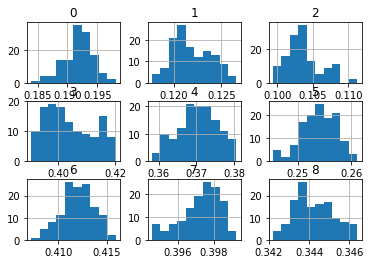

In [19]:
df_std.hist()
plt.show()

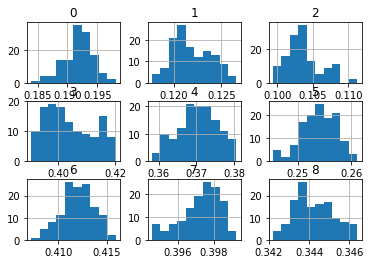

In [20]:
df_std.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [21]:
X_train, X_test = standardize(X_train, X_test)

In [22]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

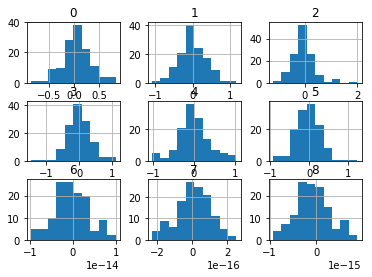

In [23]:
df_mean.hist()
plt.show()